In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os

In [58]:
image_path = "../data/raw"

In [7]:
annotations = pd.read_csv("../data/processed/annotations.csv")
labels = pd.read_csv("../data/processed/labels.csv", encoding='unicode_escape')

In [22]:
labels['Abbreviation'] = labels['Abbreviation'].str.strip()

In [24]:
label_map = labels[['Index', 'Abbreviation']].set_index('Index').to_dict()['Abbreviation']

In [25]:
label_map

{1: 'Active',
 2: 'Afraid',
 3: 'Alarmed',
 4: 'Alert',
 5: 'Amazed',
 6: 'Amused',
 7: 'Angry',
 8: 'Calm',
 9: 'Cheerful',
 10: 'Confident',
 11: 'Conscious',
 12: 'Creative',
 13: 'Disturbed',
 14: 'Eager',
 15: 'Educated',
 16: 'Emotional',
 17: 'Empathetic',
 18: 'Fashionable',
 19: 'Feminine',
 20: 'Grateful',
 21: 'Inspired',
 22: 'Jealous',
 23: 'Loving',
 24: 'Manly',
 25: 'Persuaded',
 26: 'Pessimistic',
 27: 'Proud',
 28: 'Sad',
 29: 'Thrifty',
 30: 'Youthful'}

In [28]:
annotations = annotations.set_index("Path")

In [34]:
[label_map[int(label)] for label in annotations.columns]

['Active',
 'Afraid',
 'Alarmed',
 'Alert',
 'Amazed',
 'Amused',
 'Angry',
 'Calm',
 'Cheerful',
 'Confident',
 'Conscious',
 'Creative',
 'Disturbed',
 'Eager',
 'Educated',
 'Emotional',
 'Empathetic',
 'Fashionable',
 'Feminine',
 'Grateful',
 'Inspired',
 'Jealous',
 'Loving',
 'Manly',
 'Persuaded',
 'Pessimistic',
 'Proud',
 'Sad',
 'Thrifty',
 'Youthful']

In [35]:
annotations.columns = ['Active',
                        'Afraid',
                        'Alarmed',
                        'Alert',
                        'Amazed',
                        'Amused',
                        'Angry',
                        'Calm',
                        'Cheerful',
                        'Confident',
                        'Conscious',
                        'Creative',
                        'Disturbed',
                        'Eager',
                        'Educated',
                        'Emotional',
                        'Empathetic',
                        'Fashionable',
                        'Feminine',
                        'Grateful',
                        'Inspired',
                        'Jealous',
                        'Loving',
                        'Manly',
                        'Persuaded',
                        'Pessimistic',
                        'Proud',
                        'Sad',
                        'Thrifty',
                        'Youthful']

In [52]:
annotations.sum(axis=1).value_counts()

3.0     7420
4.0     6804
5.0     5743
6.0     3990
7.0     2418
8.0     1528
9.0      875
10.0     591
11.0     290
12.0     165
13.0     135
14.0     119
15.0     102
16.0      75
17.0      53
18.0      19
19.0       5
20.0       4
21.0       2
22.0       1
23.0       1
dtype: int64

In [54]:
annotations.sum(axis=1)[annotations.sum(axis=1)==23]

Path
0/49380.jpg    23.0
dtype: float64

In [55]:
annotations

,Active,Afraid,Alarmed,Alert,Amazed,Amused,Angry,Calm,Cheerful,Confident,...,Inspired,Jealous,Loving,Manly,Persuaded,Pessimistic,Proud,Sad,Thrifty,Youthful
Path,,,,,,,,,,,,,,,,,,,,,
10/170741.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/80990.jpg,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
0/27000.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/10211.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2/97682.jpg,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/175453.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/108280.jpg,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0/128060.jpg,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
annotations.sample(5)

,Active,Afraid,Alarmed,Alert,Amazed,Amused,Angry,Calm,Cheerful,Confident,...,Inspired,Jealous,Loving,Manly,Persuaded,Pessimistic,Proud,Sad,Thrifty,Youthful
Path,,,,,,,,,,,,,,,,,,,,,
3/25603.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
0/2680.jpg,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/61951.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2/128132.jpg,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1/34101.jpg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [61]:
image_path

'../data/raw'

'CreativeEagerThrifty'

C:\Users\Maedr3\AppData\Local\Temp\ipykernel_24076\3333531366.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


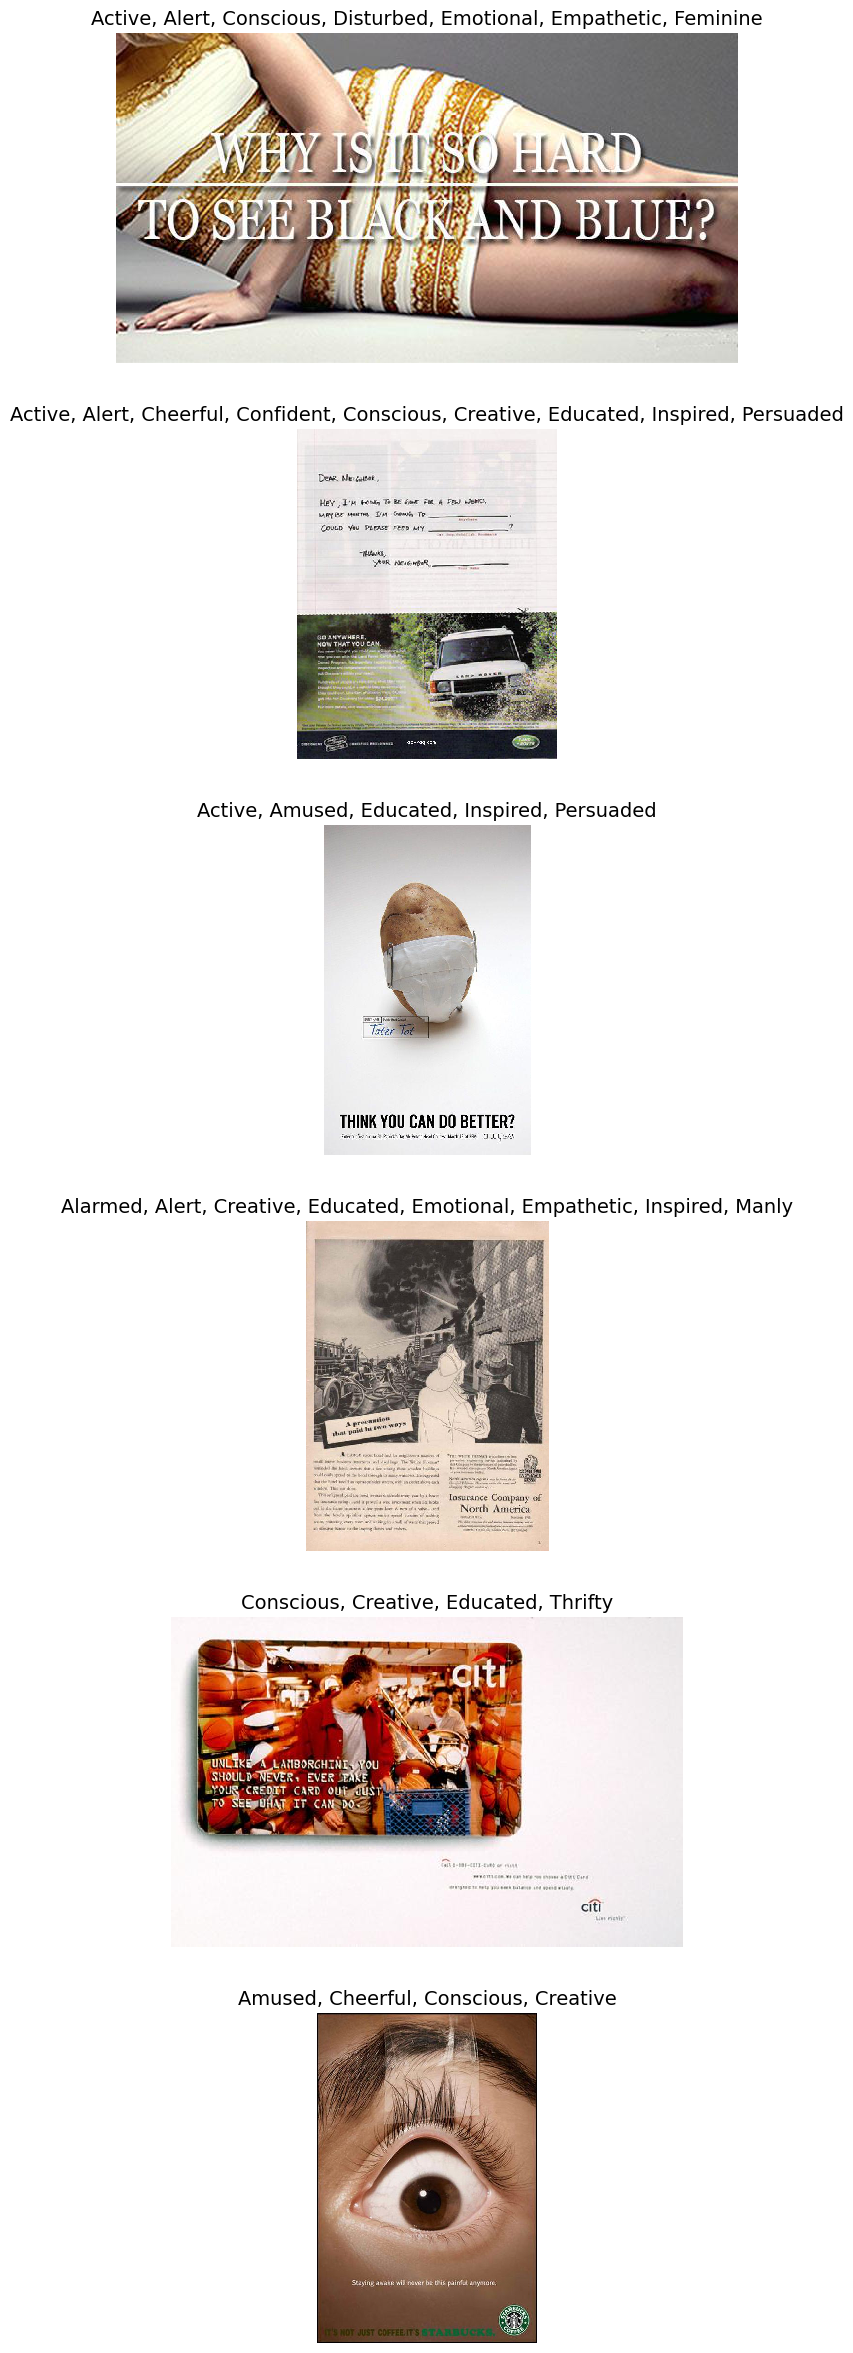

In [99]:
fig = plt.figure(figsize=(50,30))

for i, (path, label) in enumerate(annotations.sample(6).iterrows()):
    img = Image.open(os.path.join(image_path, path))
    plt.subplot(6,1, i+1, frameon=False)

    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.title(", ".join(label[label!=0].index), fontsize = 14)
    plt.axis('off')
fig.show()

In [108]:
annotations = annotations[annotations>1].dropna(how='all')

In [117]:
annotations.to_csv("../data/processed/reduced_annotations.csv")

C:\Users\Maedr3\AppData\Local\Temp\ipykernel_24076\2218334481.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


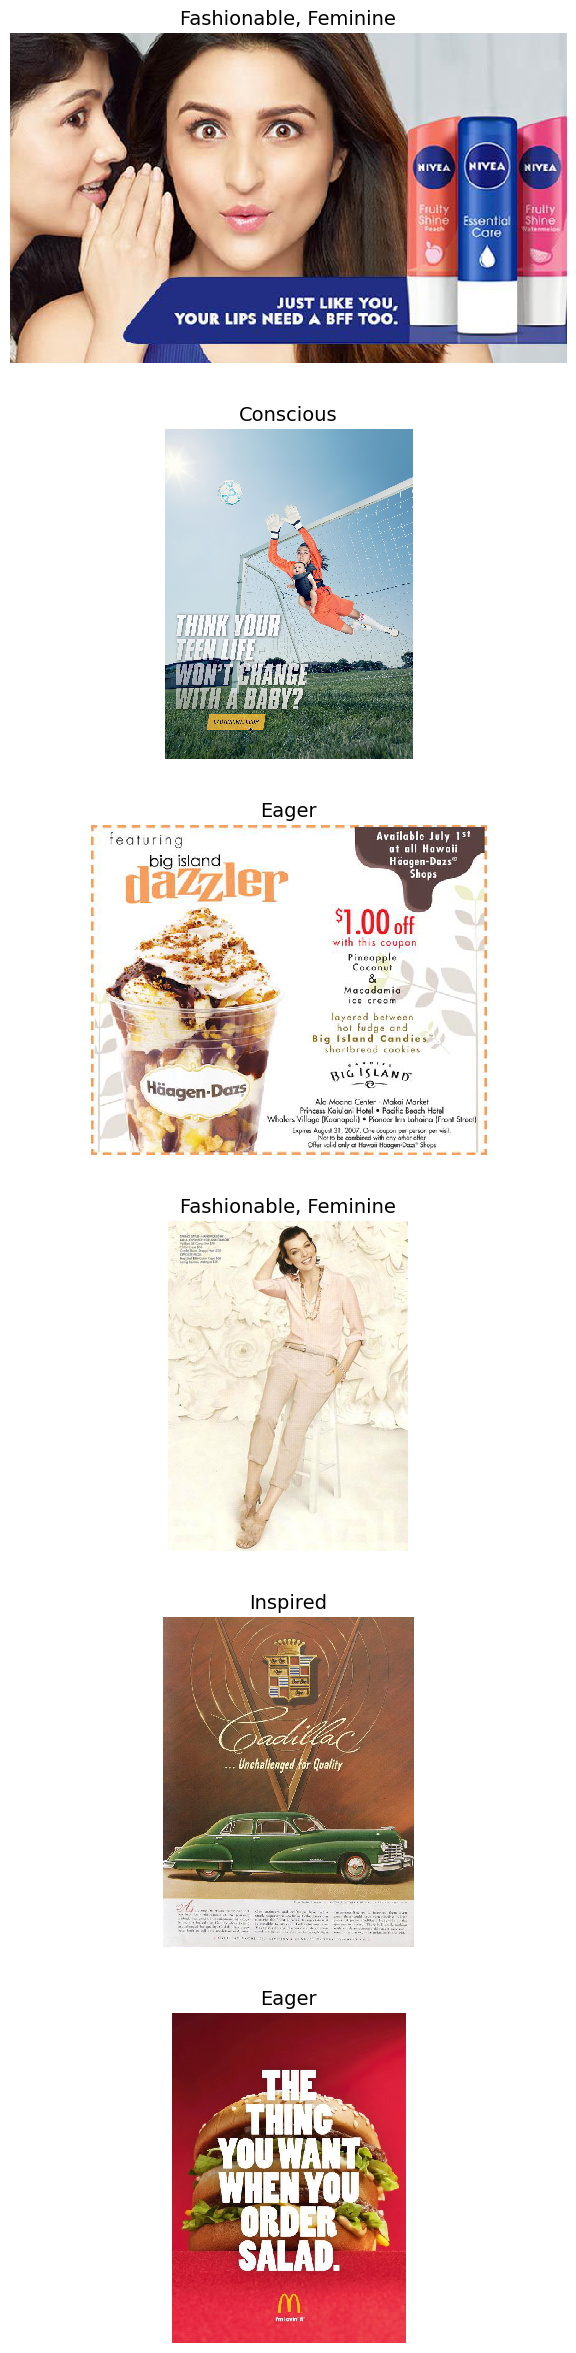

In [123]:
fig = plt.figure(figsize=(50,30))

for i, (path, label) in enumerate(annotations.sample(6).iterrows()):
    label = label.fillna(0)
    img = Image.open(os.path.join(image_path, path))
    plt.subplot(6,1, i+1, frameon=False)

    plt.imshow(img, cmap = 'gray', interpolation='nearest')
    plt.title(", ".join(label[label!=0].index), fontsize = 14)
    plt.axis('off')
fig.show()